# MIS 6341.002 - Project 1 - Group 04

Authors:
1. Shraddha Hemant Kadam (SXK190069)
2. Yash Rajkumar Keshan (YRK190000)

# Regression Problem: Prediction of Price for Airbnb's in New York City, Dataset from 2019
Target: To predict the prices of the Airbnb listings in New York City
The dataset contains listings of activities and metrics of NYC for 2019. It includes information on hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

# Libraries Imported

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.svm import SVC
from termcolor import colored
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import time
from scipy import stats
from scipy.stats import norm, skew
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("AB_NYC_2019.csv") #Reading Relevent Data
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
seed = 0 # Setting Seed for consistency

In [8]:
df_trimmed = df.sample(frac = 0.04) #Selecting a sample from the data to run the models
df_trimmed

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
47287,35676174,HOTEL ROOM STYLE STUDIO IN THE EAST VILLAGE,2860131,Kodi,Manhattan,East Village,40.72488,-73.98317,Entire home/apt,120,2,1,2019-06-24,1.00,1,6
27989,21880580,Spacious Garden Apt in Clinton Hill/Ft Greene,29478455,Mary,Brooklyn,Clinton Hill,40.69049,-73.96842,Entire home/apt,115,3,4,2019-01-17,0.21,1,2
14609,11532518,1 Bedroom Apt East Village/USQ,24319977,Charles,Manhattan,East Village,40.72895,-73.98558,Entire home/apt,200,1,0,NaN,NaN,1,0
24202,19501640,Sunny shared apartment in Harlem,45103075,Ian,Manhattan,Harlem,40.81880,-73.94505,Private room,38,3,0,NaN,NaN,1,0
42269,32810768,Feel at home at this beautiful 2Br apartment!,29959226,Elad,Queens,Kew Gardens Hills,40.72876,-73.81967,Entire home/apt,65,13,1,2019-05-25,0.67,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,1126492,Andy Phillips,6180052,Andrian,Brooklyn,Fort Greene,40.68769,-73.97490,Private room,99,5,4,2017-09-29,0.17,1,250
3274,1954450,Spacious Sunny Designer 1 Bedroom in East Village,2266169,Erika,Manhattan,East Village,40.72187,-73.98083,Entire home/apt,150,2,221,2019-06-18,3.30,1,215
38331,30193408,*NO GUEST SERVICE FEE* Beekman Tower One Bedro...,205031545,Red Awning,Manhattan,Midtown,40.75380,-73.96564,Entire home/apt,714,28,0,NaN,NaN,49,257
47989,36026259,1 bdr in heart of Harlem,6150742,Anna,Manhattan,Harlem,40.81761,-73.94434,Private room,80,1,1,2019-07-07,1.00,1,86


In [9]:
train, test = train_test_split(df_trimmed, test_size=0.25, random_state=seed, shuffle=True)

# Generating Percentage of Missing Values

In [10]:
total = train.isnull().sum().sort_values(ascending = False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percentage],axis = 1,keys = ['Total','Percentage'])
missing_data.head(23)

,Total,Percentage
reviews_per_month,292,0.199046
last_review,292,0.199046
name,1,0.000682
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000
longitude,0,0.000000


In [11]:
def missing_data(data): # Creating a Function to replace missing data   
    missing_datatypes = [j for i in data.columns for j in ['-','?','--','@','NA','NaN','na','Na',' '] 
                         if j in data[i].unique()]
    if len(missing_datatypes) > 0 and data.isnull().values.any() == False:
        print(set(missing_datatypes))
    elif len(missing_datatypes) > 0 and data.isnull().values.any() == True:
        missing_datatypes.append('NaN')
        print(set(missing_datatypes))
    elif len(missing_datatypes) == 0 and data.isnull().values.any() == True:
        print('NaN')
    else:
        print('No missing data founded')

In [12]:
missing_data(train) # Missing data update in Trainig dataset

NaN


In [13]:
train = train[['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'price']]
test = test[['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'price']]

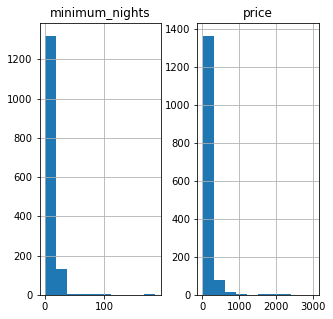

In [14]:
data_distribution = train.hist(figsize=(5,5)) # Plotting Count distribution of nights vs price

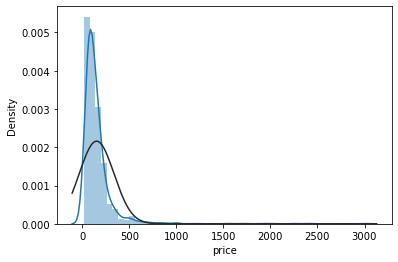

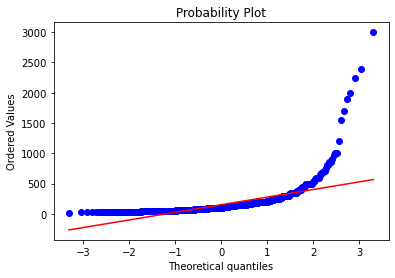

In [15]:
sns.distplot(train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)

In [16]:
train.corr()['price'].sort_values().drop('price')

minimum_nights   -0.012864
Name: price, dtype: float64

<AxesSubplot:>

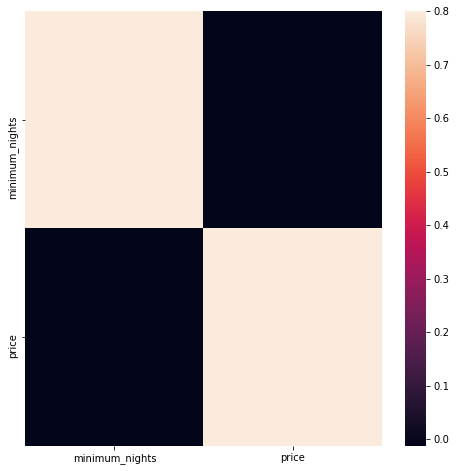

In [17]:
# generating correlation matrix for min_nights vs price
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(train.corr(),annot = False, vmax=.8)

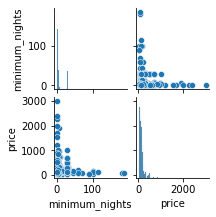

In [18]:
sns.pairplot(train, height = 1.5) # Scatter-plot to display distribution of values
plt.show()

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

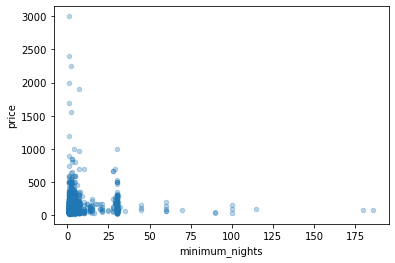

In [19]:
var = 'minimum_nights'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', alpha=0.3)

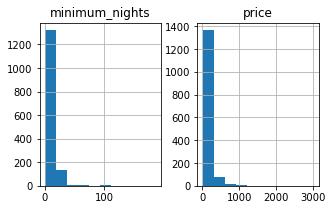

In [20]:
data_distribution = train.hist(figsize=(5, 3))

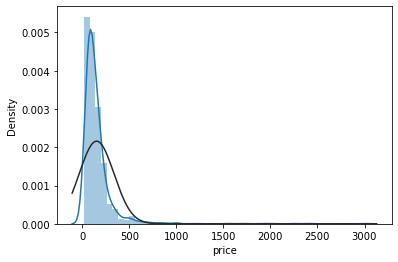

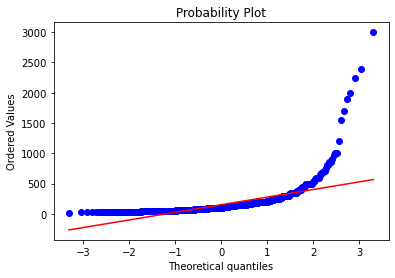

In [21]:
sns.distplot(train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)

In [22]:
X_train = train.drop(['price'], axis=1)
y_train = train['price'].values
X_test = test.drop(['price'], axis=1)
y_test= test['price'].values

# Removing Skewness in the Dataset

In [23]:
num_cols = X_train._get_numeric_data().columns.tolist()
pt = PowerTransformer(method='yeo-johnson')
X_train[num_cols]= pt.fit_transform(X_train[num_cols])
X_test[num_cols]= pt.transform(X_test[num_cols])
y_train = pt.fit_transform(y_train.reshape(-1, 1))
y_test = pt.transform(y_test.reshape(-1, 1))

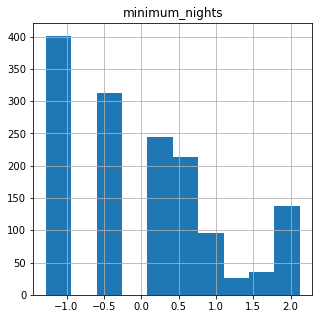

In [24]:
# Distribution of minimum_nights to book using histogram
data_distribution = X_train.hist(figsize=(5,5))

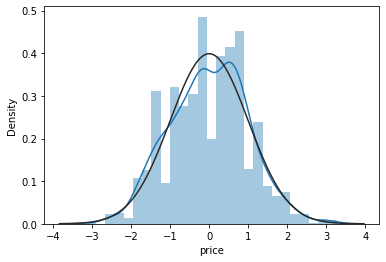

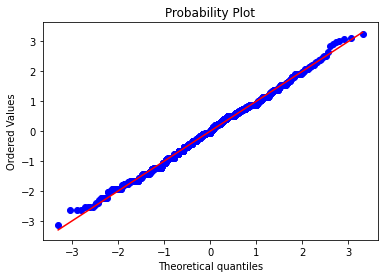

In [25]:
# Generating Distribution and probablit plot for target variable Price
y_train_plot = train.copy()
y_train_plot['price'] = y_train
sns.distplot(y_train_plot['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(y_train_plot['price'], plot=plt)

In [26]:
le = LabelEncoder()
cat_cols_train = X_train.select_dtypes(include=['string', 'object']).columns.tolist()
cat_cols_test = X_test.select_dtypes(include=['string', 'object']).columns.tolist()
for col in cat_cols_train:
    X_train[col] = le.fit_transform(X_train[col].astype('string')) # fitting the test dataset due to unseen labels in the train dataset
for col in cat_cols_test:
    X_test[col] = le.fit_transform(X_test[col].astype('string'))

In [27]:
X_train.head(3)

,neighbourhood_group,neighbourhood,room_type,minimum_nights
15124,2,38,0,0.511051
48111,0,21,1,-1.275234
33443,1,32,0,0.511051


In [28]:
X_test.head(3)

,neighbourhood_group,neighbourhood,room_type,minimum_nights
13631,1,33,1,-0.326829
45869,1,96,0,-0.326829
3600,2,90,0,1.036401


In [29]:
X_train['price'] = y_train.ravel().tolist() #Extracting price from training dataset
X_train.drop(X_train[(X_train['price']<-4)].index, inplace=True) # Removing column price from training dataset
y_train = X_train['price'] # Passing price to y_train for testing
X_train.drop('price', axis=1, inplace=True)

In [75]:
X_train.head(5)

,neighbourhood_group,neighbourhood,room_type,minimum_nights
40778,2,119,0,1.036401
9252,1,15,1,-0.326829
28031,1,126,0,0.511051
747,1,6,1,1.297340
36199,1,49,0,0.185628


In [74]:
y_train

array([ 0.19082657, -1.24455405, -0.0806774 , ..., -0.11160699,
       -0.80507209, -0.53756752])

In [72]:
X_test.head(5)

,neighbourhood_group,neighbourhood,room_type,minimum_nights
13631,1,33,1,-0.326829
45869,1,96,0,-0.326829
3600,2,90,0,1.036401
795,2,45,0,0.185628
19165,2,27,1,0.185628


In [33]:
# Values held by y_test
y_test

array([[ 0.71102212],
       [ 2.42154423],
       [ 1.37633059],
       [ 0.71102212],
       [-0.53756752],
       [-0.65253385],
       [ 0.50505196],
       [-1.44096969],
       [ 0.54960805],
       [-0.91721219],
       [-1.44096969],
       [ 1.00088754],
       [ 1.101311  ],
       [-1.24455405],
       [-0.65253385],
       [-0.65253385],
       [-1.1382245 ],
       [-0.53756752],
       [-2.17979266],
       [-0.24387381],
       [ 0.50505196],
       [-0.91721219],
       [-0.85999693],
       [-0.0806774 ],
       [-0.43194246],
       [ 0.8824149 ],
       [ 0.24977113],
       [-0.0806774 ],
       [-0.43194246],
       [-0.51573971],
       [ 1.99117347],
       [-0.29739025],
       [-0.14335112],
       [-0.9467328 ],
       [-0.55976801],
       [-1.07147223],
       [-2.05096288],
       [-0.0806774 ],
       [ 1.15488969],
       [ 0.67296285],
       [ 1.15488969],
       [-0.0806774 ],
       [-0.65253385],
       [ 2.14559975],
       [ 1.36516298],
       [ 0

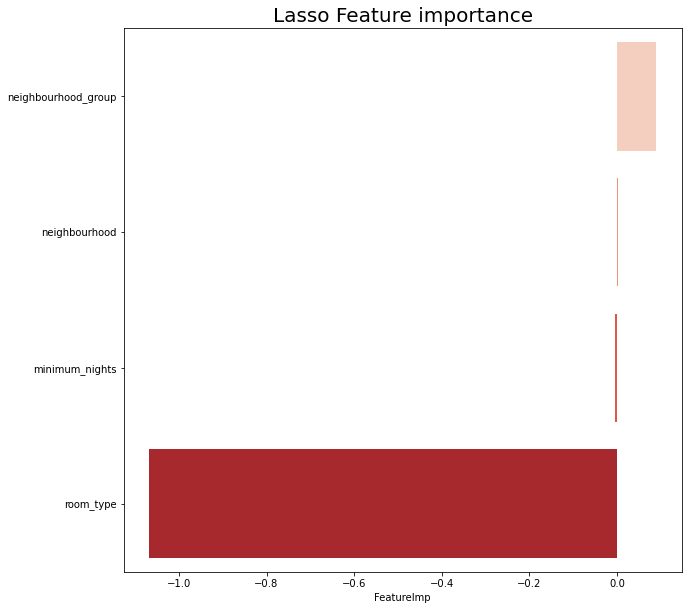

In [34]:
# Performing train_test_split to get testing and training datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train.values, random_state = seed)
model = Lasso(alpha=0.02)
model.fit(X_train,y_train)
plt.figure(figsize=(10,10))
model_ft_imp = pd.DataFrame(data=model.coef_,columns=['FeatureImp'], index = X_train.columns).sort_values(by='FeatureImp', ascending=False)
model_ft_imp_nonzero = model_ft_imp[model_ft_imp['FeatureImp'] != 0]
sns.barplot(x=model_ft_imp_nonzero['FeatureImp'], y=model_ft_imp_nonzero.index, palette="Reds")
plt.title('Lasso Feature importance', fontsize=20)
plt.show()

In [35]:
# Parameter function defined
def estimator_params(X,y):
    estimator_params = []
    score = []    
    Time = []
    estimators = [GradientBoostingRegressor(),
                   LGBMRegressor(),
                   Ridge(),
                   Lasso()]
    params = [ {'max_depth':[5,10,15], 
                'min_samples_split':[10, 50, 100],
                'learning_rate':[0.01,0.1,0.5], 
                'max_features':['sqrt'],
                'random_state': [seed]},                         
               {'num_leaves': [5,10,20], 
                'max_depth': [None, 5, 10, 20], 
                'learning_rate': [0.01,0.1,0.5], 
                'n_estimators': [10, 50, 100],
                'random_state': [seed]},
                {'alpha': [5, 10, 20, 50,100],
                'tol': [0.5,0.9],
                'random_state': [seed]},
                {'alpha' : [0.1, 1],
                 'max_iter': [1000, 2000],
                 'random_state': [seed]}]   
    # KFold   
    kf = KFold(n_splits = 5, shuffle=True, random_state = seed)  
    cv_params = {'cv': kf, 'scoring': 'neg_root_mean_squared_error', 'verbose': 0}
    # GridSearchCV    
    for estimator,param in zip(estimators, params):
        start = time.time()        
        grid_solver = GridSearchCV(estimator, param_grid = param, **cv_params).fit(X_train, y_train)
        estimator_params.append(grid_solver.best_estimator_)
        score.append(-(grid_solver.best_score_))
        stop = time.time()
        print('{} optimization finished'.format(str(estimator)))
        print()
        Time.append(stop-start)        
    global estimator_params_df    
    estimator_params_df = pd.DataFrame(columns = ['Estimator_params','Score_RMSE','Time'])
    estimator_params_df['Estimator_params']= estimator_params
    estimator_params_df['Score_RMSE'] = score
    estimator_params_df['Time']= Time   
    return estimator_params_df

In [36]:
estimator_params(X_train, y_train) #Running optimization parameters

GradientBoostingRegressor() optimization finished

LGBMRegressor() optimization finished

Ridge() optimization finished

Lasso() optimization finished



,Estimator_params,Score_RMSE,Time
0,([DecisionTreeRegressor(criterion='friedman_ms...,0.713808,8.119933
1,"LGBMRegressor(max_depth=None, num_leaves=5, ra...",0.698287,9.618638
2,"Ridge(alpha=5, random_state=0, tol=0.5)",0.765710,0.288202
3,"Lasso(alpha=0.1, random_state=0)",0.790928,0.099732


In [37]:
estimator_params_df['Estimator_params'][1] #Running LGBMregressor with the lowest RMSE Score

LGBMRegressor(max_depth=None, num_leaves=5, random_state=0)

In [38]:
model = LGBMRegressor(max_depth=10, num_leaves=20, random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = pt.inverse_transform(predictions.reshape(-1,1)) # Reversing the power transformation
predictions = np.around(predictions,2).ravel().tolist()

In [39]:
predictions

[73.25,
 218.51,
 363.97,
 243.66,
 102.4,
 46.26,
 57.09,
 59.27,
 101.85,
 60.64,
 91.49,
 152.55,
 245.63,
 105.25,
 106.4,
 64.89,
 196.72,
 67.21,
 134.43,
 139.5,
 130.75,
 50.5,
 60.64,
 140.45,
 113.31,
 243.66,
 286.89,
 151.76,
 67.21,
 116.84,
 260.99,
 148.64,
 67.21,
 140.01,
 66.02,
 68.27,
 113.65,
 151.89,
 218.51,
 286.89,
 249.81,
 138.49,
 53.28,
 223.36,
 152.57,
 111.76,
 120.73,
 86.96,
 96.14,
 124.37,
 249.81,
 101.94,
 142.51,
 122.74,
 217.46,
 51.41,
 55.62,
 124.89,
 57.36,
 270.41,
 272.5,
 62.05,
 146.1,
 230.36,
 52.43,
 123.54,
 109.47,
 73.86,
 96.7,
 56.39,
 55.21,
 71.5,
 54.61,
 99.66,
 159.38,
 182.06,
 182.06,
 144.49,
 183.67,
 195.28,
 87.68,
 169.62,
 46.05,
 145.16,
 66.71,
 130.38,
 107.0,
 73.86,
 272.5,
 123.85,
 84.32,
 197.69,
 226.25,
 108.09,
 148.44,
 69.31,
 146.1,
 144.63,
 218.51,
 272.5,
 208.25,
 155.49,
 107.85,
 146.1,
 75.69,
 44.18,
 87.68,
 134.43,
 125.49,
 55.77,
 170.0,
 103.9,
 157.1,
 102.4,
 272.5,
 85.74,
 55.62,
 70.07

# Running All Regressions
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Support Vector Machine
5. SVR Regressor
6. KNN
7. Polynomial Regressor
8. Decision Tree Regressor

# 1. Linear Regression


In [40]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train) # Fitting Linear Regression over Training data

LinearRegression()

In [41]:
print(linear_reg.score(X_train, y_train)) #Train Score of Linear Regression
print(linear_reg.score(X_test, y_test)) #Test Score of Linear Regression

0.41761768547130973
0.4177473337197736


In [42]:
pred = linear_reg.predict(X_test)
pred 
df_pred = pd.DataFrame(pred, columns=['pred_price']) 
df_pred 

,pred_price
0,-0.699411
1,0.626384
2,0.694221
3,0.588833
4,-0.606341
...,...
484,0.333560
485,0.731065
486,-0.512796
487,0.416492


In [70]:
y_test 
df_y_test = pd.DataFrame(y_test, columns=['price'])
df_y_test

,price
0,0.711022
1,2.421544
2,1.376331
3,0.711022
4,-0.537568
...,...
484,0.505052
485,1.534697
486,-0.917212
487,1.106311


In [71]:
test_pred = pd.concat([df_y_test, df_pred], axis = 1)
test_pred #Column Comparing the actual prices with predicted prices after running Linear Regression

,price,pred_price
0,0.711022,-0.699411
1,2.421544,0.626384
2,1.376331,0.694221
3,0.711022,0.588833
4,-0.537568,-0.606341
...,...,...
484,0.505052,0.333560
485,1.534697,0.731065
486,-0.917212,-0.512796
487,1.106311,0.416492


In [45]:
print('Linear Regression')
linear_reg_score_train = round((linear_reg.score(X_train, y_train)),2)
print("\nTrain score: ",linear_reg_score_train)
linear_reg_score_test = round((linear_reg.score(X_test, y_test)),2)
print("Test score: ",linear_reg_score_test)
y_pred_test = linear_reg.predict(X_test)
rmse_lreg = np.sqrt(mean_squared_error(pred, y_test)**2)
print("RMSE LREG: ",rmse_lreg)

Linear Regression

Train score:  0.42
Test score:  0.42
RMSE LREG:  0.6313539489554021


# 2. Ridge Regression

In [46]:
# Generating hyperparamter value of alpha to run Ridge Regression over the traing data
ridge_params = {'alpha':[0.0001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 15]}
n = 10000
grid_search_ridge = GridSearchCV(linear_model.Ridge(random_state=0), ridge_params, cv=5, n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

print("\nBest tuning parameter obtained from grid search: " ,grid_search_ridge.best_params_)


Best tuning parameter obtained from grid search:  {'alpha': 0.1}


In [47]:
# Using alpha value as 0.1 as the best tuning parametere for Ridge Regression
ridge = linear_model.Ridge(grid_search_ridge.best_params_['alpha'])
ridge.fit(X_train,y_train)

ridge_score_train = round((ridge.score(X_train,y_train)),2)
print("\nTrain score: ",round((ridge.score(X_train,y_train)),2) )

ridge_score_test = round((ridge.score(X_test,y_test)),2)
print("Test score: ",round((ridge.score(X_test,y_test)),2) )
y_pred_test = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE RIDGE: ",rmse_ridge)


Train score:  0.42
Test score:  0.42
RMSE RIDGE:  0.6313685400106361


In [48]:
#Cross validation for mean score k = 10
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(linear_model.Ridge(alpha),X_train,y_train,cv=10))
    test_scores.append(cross_val_score(linear_model.Ridge(alpha),X_test,y_test,cv=10))

print("\nMean Train score:",np.mean(train_scores))
print("Mean Test score: ",np.mean(test_scores))


Mean Train score: 0.4070036259862282
Mean Test score:  0.41065960976746735


Text(0.5, 0, 'Alpha')

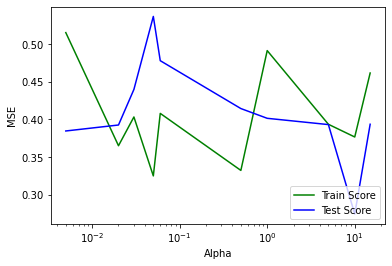

In [49]:
# Generating a plot of test and train scores
%matplotlib inline
train_score_array = []
test_score_array = []

x_axis = np.array([0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15])
plt.plot(x_axis, np.array(train_scores).reshape(-1,1), c = 'g', label = 'Train Score')
plt.plot(x_axis, np.array(test_scores).reshape(-1,1), c = 'b', label = 'Test Score')
plt.legend()
plt.ylabel('MSE')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel("Alpha")

# 3. Lasso Regression

In [50]:
#Lasso Regression taking range of Alpha values with 5 fold cross validation to find the best parameter
lasso_params = {'alpha':[0.0001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5, 7, 10]}

grids_lasso = GridSearchCV(linear_model.Lasso(random_state=0), lasso_params, cv=10, n_jobs=-1)
grids_lasso.fit(X_train, y_train)

print("\n The Best tuning parameter from lasso search: " ,grids_lasso.best_params_)


 The Best tuning parameter from lasso search:  {'alpha': 0.0001}


In [51]:
# Using alpha value as 0.0001 as the best tuning parametere for Lasso Regression
lasso = linear_model.Lasso(grids_lasso.best_params_['alpha'])
lasso.fit(X_train,y_train)

lasso_score_train = round((lasso.score(X_train,y_train)),2)
print("\nTrain score: ",round((lasso.score(X_train,y_train)),2) )

lasso_score_test = round((lasso.score(X_test,y_test)),2)
print("Test score: ",round((lasso.score(X_test,y_test)),2) )
y_pred_test = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LASSO: ",rmse_lasso)


Train score:  0.42
Test score:  0.42
RMSE LASSO:  0.6313809598678397


In [52]:
lasso = linear_model.Lasso(grids_lasso.best_params_['alpha'])
lasso.fit(X_train,y_train)

lasso_score_train = round((lasso.score(X_train,y_train)),2)
print("\nTrain score: ",round((lasso.score(X_train,y_train)),2) )

lasso_score_test = round((lasso.score(X_test,y_test)),2)
print("Test score: ",round((lasso.score(X_test,y_test)),2) )
y_pred_test = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LASSO: ",rmse_lasso)


Train score:  0.42
Test score:  0.42
RMSE LASSO:  0.6313809598678397


Text(0.5, 0, 'Alpha')

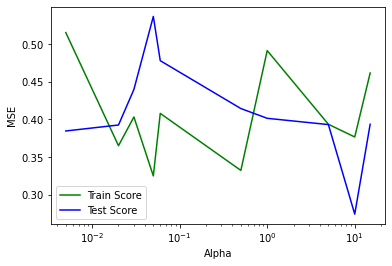

In [53]:
# Generating a plot comparing test and training scores from Lasso Regression
%matplotlib inline
train_score_array = []
test_score_array = []

x_axis = np.array([0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15])
plt.plot(x_axis, np.array(train_scores).reshape(-1,1), c = 'g', label = 'Train Score')
plt.plot(x_axis, np.array(test_scores).reshape(-1,1), c = 'b', label = 'Test Score')
plt.legend()
plt.ylabel('MSE')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel("Alpha")

# 4. SVM models (simple, linear, polynomial and rbf)

In [54]:
# Simple SVM
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
model = SVR()
grid_SVR = GridSearchCV(estimator=model, param_grid=param_grid,scoring ="r2")
grid_SVR.fit(X_train,y_train)
print("The best score of Grid search for Simple SVM is ",grid_SVR.best_score_)
print("The best estimator of Grid search for Simple SVM is ",grid_SVR.best_estimator_)

The best score of Grid search for Simple SVM is  0.4116443590138542
The best estimator of Grid search for Simple SVM is  SVR(C=100)


In [55]:
# Polynomial Kernel
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
model = SVR(kernel="poly")
grid_SVR = GridSearchCV(estimator=model, param_grid=param_grid,scoring ="r2")
grid_SVR.fit(X_train,y_train)
print("The best score of Grid search for Polynomial SVM is ",grid_SVR.best_score_)
print("The best estimator of Grid search for Polynomial SVM is ",grid_SVR.best_estimator_)

The best score of Grid search for Polynomial SVM is  0.18319273220744442
The best estimator of Grid search for Polynomial SVM is  SVR(C=100, kernel='poly')


In [56]:
# RBF Kernel
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
model = SVR(kernel="rbf")
grid_SVR = GridSearchCV(estimator=model, param_grid=param_grid,scoring ="r2")
grid_SVR.fit(X_train,y_train)
print("The best score of Grid search for RBF SVM is ",grid_SVR.best_score_)
print("The best estimator of Grid search for RBF SVM is ",grid_SVR.best_estimator_)

The best score of Grid search for RBF SVM is  0.4116443590138542
The best estimator of Grid search for RBF SVM is  SVR(C=100)


In [ ]:
# Linear Kernel
param_grid = {'C' : [0.001, 0.01, 0.1, 1 ,5, 10, 100]}
model = SVR(kernel="linear")
grid_SVR = GridSearchCV(estimator=model, param_grid=param_grid,scoring ="r2")
grid_SVR.fit(X_train,y_train)
print("The best score of Grid search for Linear SVM is ",grid_SVR.best_score_)
print("The best estimator of Grid search for Linear SVM is ",grid_SVR.best_estimator_)

# Support Vector Regression

In [57]:
# Running Support Vector Regression Overe the Data with C 100 and Gamma as 0.01
reg_SVR = SVR(C=100, kernel='linear', gamma = .01)
reg_SVR.fit(X_train, y_train)
reg_pred = reg_SVR.predict(X_test)

SVR_reg_train_score = round((reg_SVR.score(X_train, y_train)),2)
SVR_reg_test_score= round((reg_SVR.score(X_test, y_test)),2)
print("\nTrain score: ",SVR_reg_train_score)
print("Test score: ",SVR_reg_test_score)

rmse_SVR = np.sqrt(mean_squared_error(reg_pred, y_test)**2)
print("RMSE SVR Regressor: ",rmse_SVR)


Train score:  0.21
Test score:  0.34
RMSE SVR Regressor:  0.7122504380859348


In [58]:
train_scores = []
test_scores = []
train_scores.append(cross_val_score(reg_SVR,X_train,y_train,cv=10))
test_scores.append(cross_val_score(reg_SVR,X_test,y_test,cv=10))

print("\nMean Train score: ",np.mean(train_scores))
print("Mean Test score: ",np.mean(test_scores))


Mean Train score:  -1.568793262017626
Mean Test score:  0.270418987495431


# KNN Regressor

In [59]:
#K- Neighbours Regressor
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range)


knn = KNeighborsRegressor()

gridknn = GridSearchCV(knn, param_grid, cv = 10)
gridknn.fit(X_train,y_train)
print (gridknn.best_params_)
print (gridknn.best_estimator_)
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range)


knn = KNeighborsRegressor()

gridknn = GridSearchCV(knn, param_grid, cv = 10)
gridknn.fit(X_train,y_train)
print (gridknn.best_params_)
print (gridknn.best_estimator_)

{'n_neighbors': 4}
KNeighborsRegressor(n_neighbors=4)
{'n_neighbors': 4}
KNeighborsRegressor(n_neighbors=4)


In [60]:
# As we calculated that the value for n should be 4, hence running KNN with n = 4
knn_reg = KNeighborsRegressor(gridknn.best_params_['n_neighbors'])
knn_reg.fit(X_train, y_train)

knn_reg_train_score = round((knn_reg.score(X_train, y_train)),2)
print("\nTrain score: ",knn_reg_train_score)
knn_reg_test_score= round((knn_reg.score(X_test, y_test)),2)
print("Test score: ",knn_reg_test_score)


y_pred_test = knn_reg.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE kNN Regressor: ",rmse_knn)


Train score:  0.59
Test score:  0.18
RMSE kNN Regressor:  0.8922393189466848


In [61]:
train_scores = []
test_scores = []
for k in range(1,10):
    train_scores.append(cross_val_score(KNeighborsRegressor(k),X_train,y_train,cv=10))
    test_scores.append(cross_val_score(KNeighborsRegressor(k),X_test,y_test,cv=10))
print("\nMean Train score: ",np.mean(train_scores))
print("Mean Test score: ",np.mean(test_scores))


Mean Train score:  0.3024261072555681
Mean Test score:  0.21902514842823292


Text(0, 0.5, 'MSE')

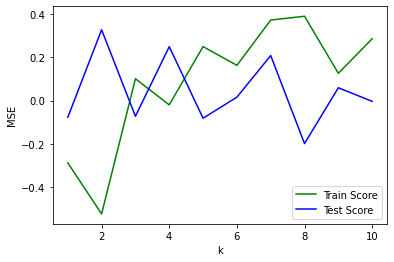

In [62]:
# Plot comparing training as test scores for KNN model
%matplotlib inline
train_score_array = []
test_score_array = []

x_axis = np.array([1,2,3,4,5,6,7,8,9,10])
plt.plot(x_axis, np.array(train_scores[0]).reshape(-1,1), c = 'g', label = 'Train Score')
plt.plot(x_axis, np.array(test_scores[0]).reshape(-1,1), c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

# Polynomial Regression

In [63]:
# Polynomial Hyperparameter selection to run Polynomial Regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
poly_grid.fit(X_train, y_train)

print("Best degree: ",poly_grid.best_params_['polynomialfeatures__degree'])
print("Best score: ",poly_grid.best_score_)

Best degree:  2
Best score:  0.4777643006211451


In [64]:
# Runnign Polynomial Regression with Degree as 2 as predicted by hyperparameter tuning
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
linear_reg.fit(X_train_poly, y_train)
poly_score_train = round((linear_reg.score(X_train_poly, y_train)),2)
print(poly_score_train)
poly_score_test = round((linear_reg.score(X_test_poly, y_test)),2)
print(poly_score_test)

y_pred_poly_test = poly_grid.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_pred_poly_test, y_test)**2)
print("RMSE POLY: ",rmse_poly)

0.5
0.47
RMSE POLY:  0.5741361810536304


In [65]:
polytrain_score = []
polytest_score =[]
polytrain_score.append(cross_val_score(poly_grid,X_train,y_train,cv=5))


polytest_score.append(cross_val_score(poly_grid,X_test,y_test,cv=5))

print("\nMean Train score: ",np.mean(polytrain_score))
print("Mean Test score: ",np.mean(polytest_score))


Mean Train score:  0.4777643006212305
Mean Test score:  0.4602039275085608


# Decision Tree Regressor

In [67]:
# Finding the Mean Train scores with and without Cross Validation using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0, criterion="mae")
dt_fit = dt.fit(X_train, y_train)

dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)
print("\nMean Train score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(dt_fit.score(X_train, y_train)))


Mean Train score: 0.28803177231555976
score without cv: 0.8042368942347695


In [68]:
# Finding the R-squared scores for training data and test data for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DTree = DecisionTreeRegressor(min_samples_leaf = .0001)
DTree.fit(X_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(X_test, y_test)))

R-squared score (training): 0.817
R-squared score (test): -0.038


# Selection of best model



In [69]:
# Comparing the RMSE, Train Score and Test scores of all models run above to find the best model
from sklearn.metrics import r2_score
models = pd.DataFrame({
                'Models': ['Linear Regression','Ridge Regression','Lasso Regression','Support Vector Machine_Linear','K-Nearest Neighbors','Polynomial Regression'],
                'Train_Score':[linear_reg_score_train, ridge_score_train, lasso_score_train, SVR_reg_train_score, knn_reg_train_score, poly_score_train],
                'Test_Score': [linear_reg_score_test, ridge_score_test, lasso_score_test, SVR_reg_test_score, knn_reg_test_score, poly_score_test],
                'RMSE': [rmse_lreg, rmse_ridge, rmse_lasso,rmse_SVR, rmse_knn, rmse_poly ]   
})
models.sort_values(by='RMSE', ascending=True)

,Models,Train_Score,Test_Score,RMSE
5,Polynomial Regression,0.50,0.47,0.574136
0,Linear Regression,0.42,0.42,0.631354
1,Ridge Regression,0.42,0.42,0.631369
2,Lasso Regression,0.42,0.42,0.631381
3,Support Vector Machine_Linear,0.21,0.34,0.712250
4,K-Nearest Neighbors,0.59,0.18,0.892239


# Best Model for Regression based on our dataset is:

-> The Model Polynomial Regression provides us with the best predicition of prices when compared to all other models run above.
-> The Polynomial Regression model with Train Score of 50% and Test Score of 47% and lowest Root Mean Square Error as 0.574 is the best model for out dataset to predict prices for Airbnb in New York City.